# 3 Mass-Spring System on an Air-Track

An experiment was performed with 3-glider spring system on a linear air-track. 

Assuming all gliders have the same mass, all springs have same spring constant and negligible mass and that system is frictionless. 

Mass 1 and Mass 2 were connected to each other with 2 springs in parallel. Mass 1 was connected to wall by 1 spring, Mass 3 was connected to Mass 2 and the opposite wall with 1 spring.

This system was analyzed analytically. The equations were solved analytically using normal modes, and numerically using both normal modes and directly solving. All these methods were compared with actual data (not shown here) to reach conclusions.

(This is basically half of my Lab Assignment - the other half was hand-written/used Graphical analysis)

In [1]:
import numpy as np

In [2]:
m = 1
k = 1
v = 1

In [3]:
#Initial Conditions
x10 = 0
x20 = 0
x30 = 0
v10 = v
v20 = 0
v30 = 0

In [4]:
a1 = lambda x1, x2, x3: (k/m)*(-3*x1 + 2*x2)
a2 = lambda x1, x2, x3: (k/m)*(2*x1 - 3*x2 + x3)
a3 = lambda x1, x2, x3: (k/m)*(-1*x2 - 3*x3)

In [18]:
def integrator(dt = 0.01, limit = 2000):
    t0 = 0
    
    times = []
    x1_array = []
    x2_array = []
    x3_array = []
    
    times.append(t0)
    x1_array.append(x10)
    x2_array.append(x20)
    x3_array.append(x30)
    
    x1i = x10
    x2i = x20
    x3i = x30
    v1i = v10
    v2i = v20
    v3i = v30
    
    t = t0 + dt
    x1f = x1i + v1i*dt
    x2f = x2i + v2i*dt
    x3f = x3i + v3i*dt
    v1f = v1i + a1(x1f, x2f, x3f)*dt
    v2f = v2i + a2(x1f, x2f, x3f)*dt
    v3f = v3i + a3(x1f, x2f, x3f)*dt
    
    t0 = t
    x1i = x1f
    x2i = x2f
    x3i = x3f
    v1i = v1f
    v2i = v2f
    v3i = v3f
    
    for i in range(limit):
        times.append(t0)
        x1_array.append(x1i)
        x2_array.append(x2i)
        x3_array.append(x3i)
    
        t = t0 + dt
        x1f = x1i + v1i*dt
        x2f = x2i + v2i*dt
        x3f = x3i + v3i*dt
        v1f = v1i + a1(x1f, x2f, x3f)*dt
        v2f = v2i + a2(x1f, x2f, x3f)*dt
        v3f = v3i + a3(x1f, x2f, x3f)*dt
    
        t0 = t
        x1i = x1f
        x2i = x2f
        x3i = x3f
        v1i = v1f
        v2i = v2f
        v3i = v3f
    
    times.append(t)
    x1_array.append(x1f)
    x2_array.append(x2f)
    x3_array.append(x3f)
    
    return np.array(times), np.array(x1_array), np.array(x2_array), np.array(x3_array)

In [19]:
l1 = integrator()
times_lagrangian = l1[0]
x1_lagrangian = l1[1]
x2_lagrangian = l1[2]
x3_lagrangian = l1[3]

In [10]:
import matplotlib.pyplot as plt
%matplotlib nbagg

<IPython.core.display.Javascript object>


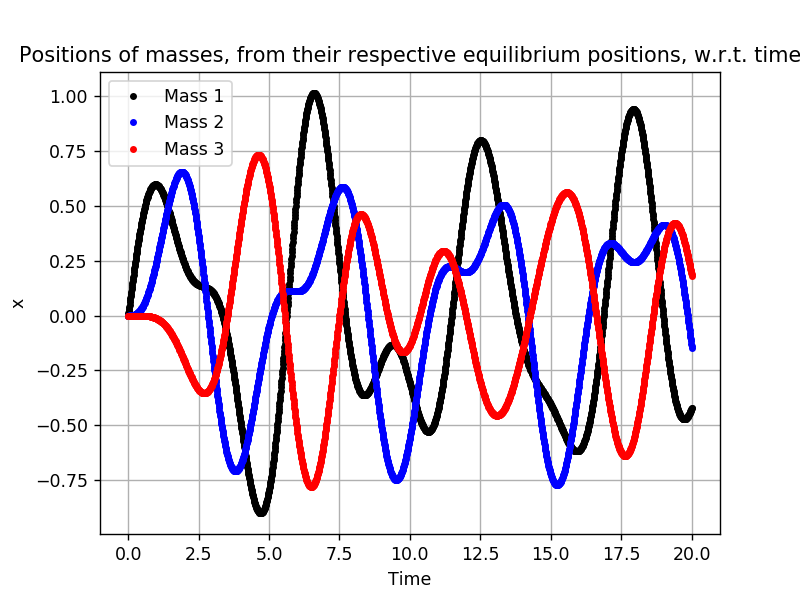

In [11]:
plt.close()

fig1 = plt.figure()
plt.plot(times_lagrangian, x1_lagrangian, 'k.', label= 'Mass 1')
plt.plot(times_lagrangian, x2_lagrangian, 'b.', label= 'Mass 2')
plt.plot(times_lagrangian, x3_lagrangian, 'r.', label= 'Mass 3')
plt.grid(True)
plt.title("Positions of masses, from their respective equilibrium positions, w.r.t. time")
plt.ylabel("x")
plt.xlabel("Time")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


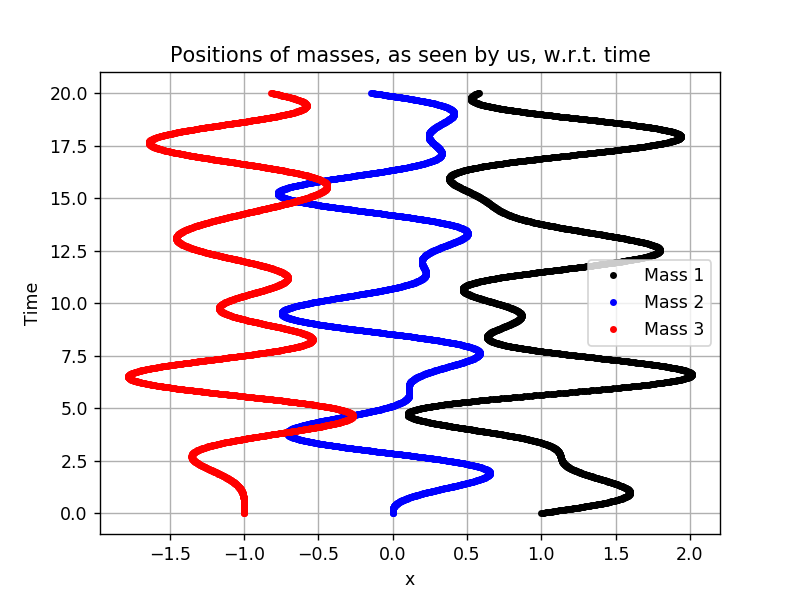

In [12]:
plt.close()

fig2 = plt.figure()
plt.plot(x1_lagrangian + 1, times_lagrangian, 'k.', label= 'Mass 1')
plt.plot(x2_lagrangian, times_lagrangian, 'b.', label= 'Mass 2')
plt.plot(x3_lagrangian - 1, times_lagrangian, 'r.', label= 'Mass 3')
plt.grid(True)
plt.title("Positions of masses, as seen by us, w.r.t. time")
plt.ylabel("Time")
plt.xlabel("x")
plt.legend()
plt.show()

#To find amplitudes of normal modes

X1 = 0.836 $x1_{lagrangian}$ + $x2_{lagrangian}$ + 0.418 $x3_{lagrangian}$

X2 = 2.587 $x1_{lagrangian}$ + $x2_{lagrangian}$ - 4.405 $x3_{lagrangian}$

X3 = -0.924 $x1_{lagrangian}$ + $x2_{lagrangian}$ - 0.316 $x3_{lagrangian}$


STOP!!!!!!!
This does not give you exact answer as the coefficients are not exact. Better use the fact that X1, X2 and X3 diagonalize the Lagrangian and so are directly solvable
Below is the code of me having done it the long way and regretting it at the end.

<IPython.core.display.Javascript object>


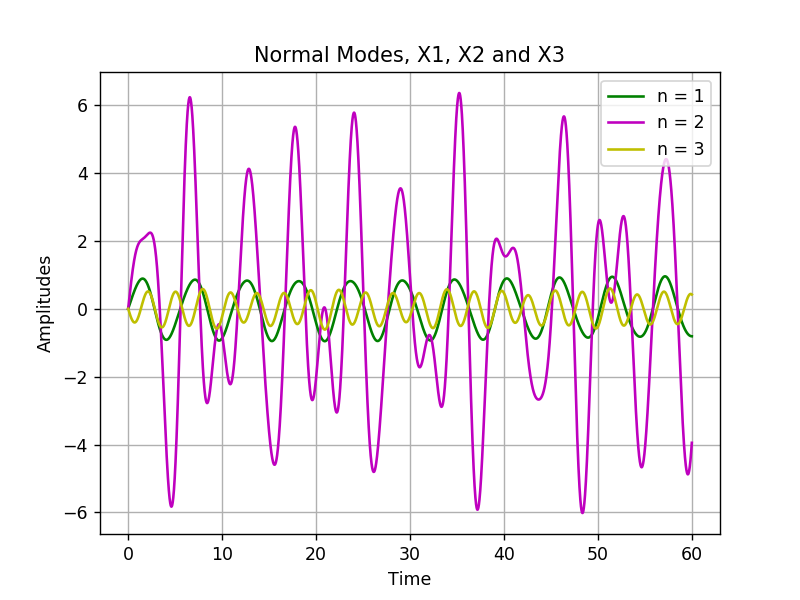

In [26]:
plt.close()

fig3 = plt.figure()
plt.plot(times_lagrangian, X1, 'g-', label= 'n = 1')
plt.plot(times_lagrangian, X2, 'm-', label= 'n = 2')
plt.plot(times_lagrangian, X3, 'y-', label= 'n = 3')
plt.grid(True)
plt.title("Normal Modes, X1, X2 and X3")
plt.ylabel("Amplitudes")
plt.xlabel("Time")
plt.legend()
plt.show()

Now to figure out frequencies of X1, X2 and X3, since they are evidently periodic.

Saved data as text files, so that could copy paste it into Graphical analysis, and perform FFT of data there. The advantage of using Graphical analysis is that you can examine, with precision, where the peaks are.
Have attached code to do FFT analysis in Python as well. Both methods are concurrent.

In [33]:
file1 = open("X1.txt", "w+")
for i in X1:
    file1.write(str(i) + " \n")
file1.close()

In [34]:
file2 = open("X2.txt", "w+")
for i in X2:
    file2.write(str(i) + " \n")
file2.close()

In [35]:
file3 = open("X3.txt", "w+")
for i in X3:
    file3.write(str(i) + " \n")
file3.close()

In [36]:
file4 = open("Times.txt", "w+")
for i in times_lagrangian:
    file4.write(str(i) + " \n")
file4.close()

Below code can be skipped if necessary... but see conclusion.

In [22]:
# Number of points
N = len(X1)

X1F = np.fft.fft(X1)
X2F = np.fft.fft(X2)
X3F = np.fft.fft(X3)
f = np.fft.fftfreq(N, 0.01)

<IPython.core.display.Javascript object>


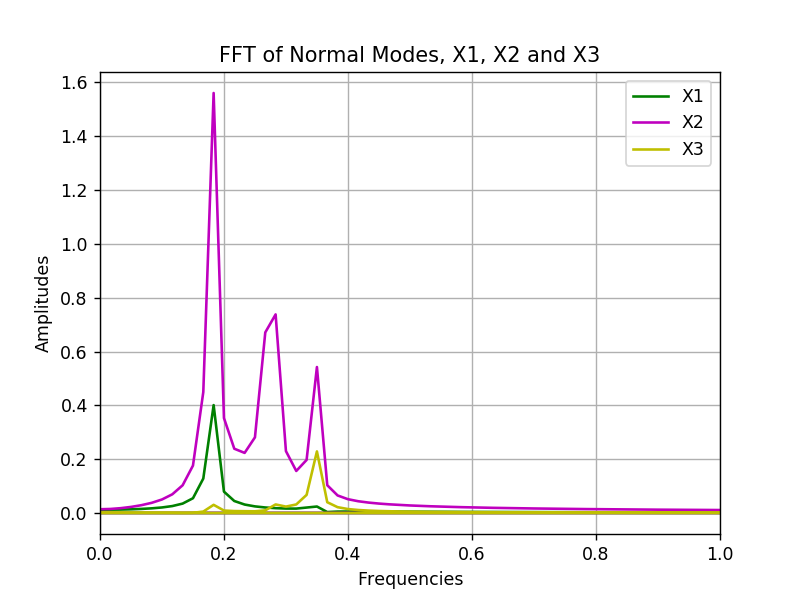

In [38]:
plt.close()

fig3 = plt.figure()
plt.plot(f, np.abs(X1F)/N, 'g-', label= 'X1')
plt.plot(f, np.abs(X2F)/N, 'm-', label= 'X2')
plt.plot(f, np.abs(X3F)/N, 'y-', label= 'X3')
#plt.plot(f, np.zeros(N), 'ko-')
plt.grid(True)
plt.title("FFT of Normal Modes, X1, X2 and X3")
plt.ylabel("Amplitudes")
plt.xlabel("Frequencies")
plt.xlim(0, 1.0)
plt.legend()
plt.show()

We expected X1, X2 and X3 to be purely sinusoidal... but they aren't because coefficients are not exact. That's why you got a periodic solution for all 3, but as a sum of other sine waves. Hence just solve it directly!